In [1]:
import numpy as np
import pandas as pd
import pathlib as pl
from datetime import datetime
import matplotlib.pyplot as plot
from pandas import DataFrame, Series

In [2]:
# read from csv files

datapath=pl.Path("../csvdata")

file_list=[]
dfs=[]
for x in datapath.glob("*[0-9].csv"):
    print("Reading "+x.name)
    f=pd.read_csv(x,index_col=0,na_values=" ")
    dfs.append(f)
    file_list.append(x.name)

Reading kVKunYang3.csv
Reading kVWanKe1.csv
Reading kVChangLiu3.csv
Reading kVJiangChuan1.csv
Reading kVChangLiu2.csv
Reading kVQinZhou4.csv
Reading kVChangLiu1.csv
Reading kVJiangChuan4.csv
Reading kVJiangChuan5.csv
Reading kVQinZhou3.csv
Reading kVKunYang1.csv
Reading kVJiangChuan3.csv
Reading kVJiangChuan2.csv
Reading kVChangLiu4.csv
Reading kVWanKe2.csv


In [3]:
cols = ["Avg[V 有效值 AB]",
# "Avg[V 总谐波畸变率 A]",
 "Avg[V 负序不平衡 Total]",
 "Avg[V SPOS All]",
 "Avg[V SNEG All]",
 "Avg[V SZERO All]",
#"Pst A",
 "Avg[I 有效值 A]",
 "Avg[I 总谐波畸变率 A]",
 "Avg[I 负序不平衡 Total]",
 "Avg[I SPOS All]",
 "Avg[I SNEG All]",
 "Avg[I ZERO All]",
# "Avg[P A]",
# "Avg[Q A]",
# "Avg[S A]",
# "Avg[功率因数 A]"
 ]

In [4]:
tr_data=DataFrame()
i=0
for df in dfs:
    for c in df.columns:
        if c.find("Avg[V SNEG All]")!=-1:
            print (c)
            tr_data[c]=df[c]
            i+=1
print(i)

 KunYang3 - Avg[V SNEG All] (V)
 WanKe1 - Avg[V SNEG All] (V)
 Changliu3 - Avg[V SNEG All] (V)
 JiangChuan1 - Avg[V SNEG All] (V)
 Changliu2 - Avg[V SNEG All] (V)
 QinZhou4 - Avg[V SNEG All] (V)
 Changliu1 - Avg[V SNEG All] (V)
 JiangChuan4 - Avg[V SNEG All] (V)
 JiangChuan5 - Avg[V SNEG All] (V)
 QinZhou3 - Avg[V SNEG All] (V)
 KunYang1 - Avg[V SNEG All] (V)
 JiangChuan3 - Avg[V SNEG All] (V)
 JiangChuan2 - Avg[V SNEG All] (V)
 Changliu4 - Avg[V SNEG All] (V)
 WanKe2 - Avg[V SNEG All] (V)
15


In [5]:
train_data=tr_data.dropna()

In [6]:
len(train_data)

3299

In [7]:
train_data=train_data.dropna(axis=1)

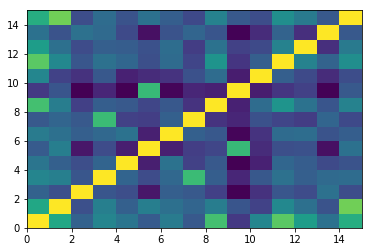

In [8]:
corMat=DataFrame(train_data.corr())
plot.pcolor(corMat)
plot.show()

In [9]:
train_data.describe()

,KunYang3 - Avg[V SNEG All] (V),WanKe1 - Avg[V SNEG All] (V),Changliu3 - Avg[V SNEG All] (V),JiangChuan1 - Avg[V SNEG All] (V),Changliu2 - Avg[V SNEG All] (V),QinZhou4 - Avg[V SNEG All] (V),Changliu1 - Avg[V SNEG All] (V),JiangChuan4 - Avg[V SNEG All] (V),JiangChuan5 - Avg[V SNEG All] (V),QinZhou3 - Avg[V SNEG All] (V),KunYang1 - Avg[V SNEG All] (V),JiangChuan3 - Avg[V SNEG All] (V),JiangChuan2 - Avg[V SNEG All] (V),Changliu4 - Avg[V SNEG All] (V),WanKe2 - Avg[V SNEG All] (V)
count,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000
mean,19.534207,11.421256,63.245622,74.797307,54.298989,7.486570,50.224348,27.766623,24.149889,9.356789,76.352067,85.496720,100.462447,57.844699,14.530042
std,2.267147,4.360179,29.131790,30.253648,27.221210,2.533809,24.892284,13.744019,11.356980,2.727240,19.457516,33.206633,30.094798,30.182571,3.707185
min,14.374767,2.240108,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.262066,44.812057,0.169499,35.402489,0.000000,4.136919
25%,17.878675,7.846543,39.836603,51.379118,39.388020,5.611864,38.199074,17.331796,15.053297,7.523959,62.832397,60.245693,78.587364,38.986485,11.858337
50%,19.479208,11.176614,55.969151,78.195992,55.687466,7.430449,52.645889,27.223791,24.802559,9.220370,70.913254,84.454132,101.600677,55.703072,14.222418
75%,20.962277,14.633019,87.910545,89.356865,78.806824,9.109927,71.154514,37.019941,30.083537,11.171183,88.299004,110.230450,122.696426,83.587933,16.900082
max,31.574720,28.223137,139.560715,198.723419,118.754166,18.301594,111.406143,90.060379,65.948715,20.585041,231.126190,206.265701,193.032059,120.589485,31.047260


In [10]:
from sklearn.model_selection import train_test_split
train,test= train_test_split(train_data,test_size=0.2,random_state=0)

In [11]:
MAX= train.max()
MIN = train.min()

In [12]:
train_s=(train-MIN)/(MAX-MIN)
test_s=(test-MIN)/(MAX-MIN)

In [13]:
train_s=train_s.fillna(0)
test_s=test_s.fillna(0)

In [14]:
#  generate X_train,Y_train,X_test,Y_test for all target features
X_train=train_s.copy();Y_train=DataFrame()

for c in train_s.columns:
    if c.find("WanKe1") !=-1 :
        Y_train[c]=train_s[c]
        X_train=X_train.drop(c,axis=1)

        
X_test=test_s.copy();Y_test=DataFrame()

for c in test_s.columns:
    if c.find("WanKe1") !=-1 :
        Y_test[c]=test_s[c]
        X_test=X_test.drop(c,axis=1)

In [15]:
###### network from keras for SHDKY data simulation ###########
from keras.models import Sequential
from keras.layers import Dense, Activation,Input
import keras


model = Sequential()

model.add(Dense(14, input_dim=14,kernel_initializer="normal"))
model.add(Activation('relu'))
model.add(Dense(7, activation='relu',kernel_initializer="normal"))
model.add(Dense(1, activation='linear',kernel_initializer="normal"))

/home/techstar/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [16]:
model.compile(loss='mean_squared_error', 
              optimizer=keras.optimizers.SGD(lr=0.02))

In [150]:
model.fit(X_train, Y_train, epochs=30,batch_size=30,
          shuffle=True,verbose=2,validation_split=0.2) 

Train on 2111 samples, validate on 528 samples
Epoch 1/30
 - 0s - loss: 0.0066 - val_loss: 0.0076
Epoch 2/30
 - 0s - loss: 0.0065 - val_loss: 0.0076
Epoch 3/30
 - 0s - loss: 0.0066 - val_loss: 0.0075
Epoch 4/30
 - 0s - loss: 0.0066 - val_loss: 0.0076
Epoch 5/30
 - 0s - loss: 0.0066 - val_loss: 0.0075
Epoch 6/30
 - 0s - loss: 0.0066 - val_loss: 0.0076
Epoch 7/30
 - 0s - loss: 0.0066 - val_loss: 0.0075
Epoch 8/30
 - 0s - loss: 0.0065 - val_loss: 0.0075
Epoch 9/30
 - 0s - loss: 0.0066 - val_loss: 0.0075
Epoch 10/30
 - 0s - loss: 0.0065 - val_loss: 0.0078
Epoch 11/30
 - 0s - loss: 0.0066 - val_loss: 0.0075
Epoch 12/30
 - 0s - loss: 0.0066 - val_loss: 0.0076
Epoch 13/30
 - 0s - loss: 0.0065 - val_loss: 0.0075
Epoch 14/30
 - 0s - loss: 0.0065 - val_loss: 0.0075
Epoch 15/30
 - 0s - loss: 0.0065 - val_loss: 0.0076
Epoch 16/30
 - 0s - loss: 0.0065 - val_loss: 0.0076
Epoch 17/30
 - 0s - loss: 0.0066 - val_loss: 0.0075
Epoch 18/30
 - 0s - loss: 0.0065 - val_loss: 0.0075
Epoch 19/30
 - 0s - loss: 

In [151]:
#((model.predict(X_test)-Y_test)/Y_test)

In [152]:
((model.predict(X_test)-Y_test)).describe()

,WanKe1 - Avg[V SNEG All] (V)
count,660.000000
mean,-0.007189
std,0.093212
min,-0.378137
25%,-0.066627
50%,-0.006951
75%,0.058185
max,0.304407


In [153]:
c=Y_test.columns
R= pd.DataFrame(model.predict(X_test),columns=['V_pred'])
R.index = Y_test.index
R= R.join(Y_test)
#R=  R*((MAX[c]-MIN[c])+MIN[c]).values[0]
R=  R*(MAX[c]-MIN[c]).values[0]+MIN[c].values[0]

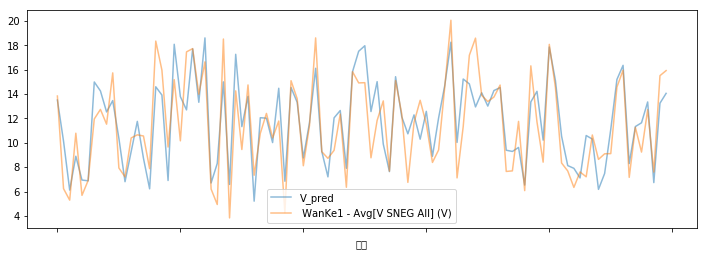

In [154]:
R_show=R.iloc[200:300,:]

import pylab
pylab.rcParams['figure.figsize'] = (12.0, 4.0)

R_show.plot(alpha =0.5,figsize = (12,4))

In [155]:
R["diff"]=(R["V_pred"]-R[c[0]])
R["diff_ptg"]=(R["V_pred"]-R[c[0]])/R[c[0]]

In [156]:
R.describe()

,V_pred,WanKe1 - Avg[V SNEG All] (V),diff,diff_ptg
count,660.000000,660.000000,660.000000,660.000000
mean,11.330583,11.517383,-0.186795,0.035040
std,3.718954,4.415000,2.421925,0.256488
min,5.096892,2.662615,-9.825135,-0.479092
25%,8.130104,7.819715,-1.731175,-0.134030
50%,11.085290,11.101592,-0.180614,-0.018572
75%,13.865123,14.761485,1.511820,0.149168
max,24.023687,24.899691,7.909429,1.310836


In [157]:
(R.diff_ptg.quantile(0.05),R.diff_ptg.quantile(0.95))

(-0.2843314988937808, 0.5417301794405024)

In [158]:
R.sort_values("diff_ptg")[-6:]

,V_pred,WanKe1 - Avg[V SNEG All] (V),diff,diff_ptg
时间,,,,
2018-02-04 23:54:00,6.219199,3.106630,3.112570,1.001912
2018-02-05 08:36:00,9.710583,4.845279,4.865304,1.004133
2018-02-07 23:12:00,14.897449,6.988021,7.909429,1.131855
2018-02-02 23:42:00,13.445404,6.195778,7.249626,1.170091
2018-02-02 05:06:00,5.871411,2.662615,3.208796,1.205130
2018-02-01 23:39:00,9.710581,4.202194,5.508387,1.310836


In [159]:
R_show[:6]

,V_pred,WanKe1 - Avg[V SNEG All] (V)
时间,,
2018-02-07 09:36:00,13.504987,13.835214
2018-02-03 00:30:00,10.131296,6.236780
2018-02-06 01:51:00,6.119767,5.294836
2018-02-03 10:45:00,8.895084,10.784618
2018-02-02 00:18:00,6.942040,5.686869
2018-02-01 01:33:00,6.880324,6.903463


In [160]:
R.corr()

,V_pred,WanKe1 - Avg[V SNEG All] (V),diff,diff_ptg
V_pred,1.000000,0.836129,0.011331,-0.030558
WanKe1 - Avg[V SNEG All] (V),0.836129,1.000000,-0.539023,-0.522135
diff,0.011331,-0.539023,1.000000,0.904892
diff_ptg,-0.030558,-0.522135,0.904892,1.000000


In [161]:
train_data.corr()[c[0]].sort_values()

 KunYang1 - Avg[V SNEG All] (V)       0.159590
 Changliu3 - Avg[V SNEG All] (V)      0.208336
 Changliu4 - Avg[V SNEG All] (V)      0.220416
 QinZhou3 - Avg[V SNEG All] (V)       0.226986
 Changliu2 - Avg[V SNEG All] (V)      0.270384
 JiangChuan4 - Avg[V SNEG All] (V)    0.291203
 JiangChuan2 - Avg[V SNEG All] (V)    0.335921
 Changliu1 - Avg[V SNEG All] (V)      0.336498
 JiangChuan5 - Avg[V SNEG All] (V)    0.392316
 QinZhou4 - Avg[V SNEG All] (V)       0.398225
 JiangChuan1 - Avg[V SNEG All] (V)    0.399910
 JiangChuan3 - Avg[V SNEG All] (V)    0.441371
 KunYang3 - Avg[V SNEG All] (V)       0.574816
 WanKe2 - Avg[V SNEG All] (V)         0.772951
 WanKe1 - Avg[V SNEG All] (V)         1.000000
Name:  WanKe1 - Avg[V SNEG All] (V), dtype: float64

In [163]:
model.save("model_h5/M_VSneg.h5")

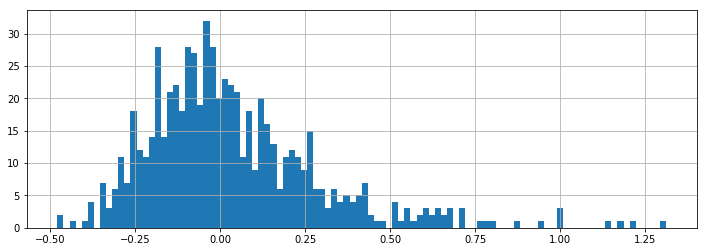

In [165]:
R.diff_ptg.hist(bins=100)